# Introduction



New York City has one of the largest homeless populations in the country. According to National Alliance to End Homelessness, NYC averages 78,604 people homeless per night in 2019, and 93.6 homeless per 10,000 people. Between 2007 to 2019, the total homeless population has increased by 56%.

Top causes of homelessness include lack of affordable housing, unemployment, poverty, and low wages. In addition, mental illness and lack of needed services, and substance abuse and needed services.

We are targeting philanthropists, social activists, community members, anyone who is willing to share their resources in making changes and advocating for others.

There is a clear need to devote resources in aiding this community in need. A new Homeless Shelter Center will be used to coordinate services across different independent shelters across NYC. With more structure and correspondence between all shelters, it will truly make a difference for those who are in need.

The focus of this Capstone Project will be to explore the best location to open a new Homeless Shelter Center. The Center will be located at a central location that is accessible and convenient. 

# Data

To find the best location for opening of a new Center, we will first identify current shelter locations. Using a list provided by Breaking Ground. Breaking Ground is a program that aims to eliminate homelessness by providing information and resources to communities in need. We will first transform the list into usable data. We will then correspond latitude and longitudinal coordinates of shelters using the Python Geocoder Package.

Next, we will create a scatter plot utilizing location coordinates. Subsequently, calculate the median latitude and longitude points to determine where this Center should be located at.

# Methodology

We are pulling data of pre-existing shelters from a list from Breaking Ground's website: https://www.nyep.uscourts.gov/reentry/NYC%20Homeless%20Shelters.pdf

This list has already been converted into a JSON file.

### Required libraries for data analysis and data visualization:
nympy, pandas, requests, bs4 (beautifulsoup), folium (map), geopy (coordinates), and matplotlib (plots).

### Import Foursquare credentials:
Client ID: WQ3ZBTEIB55TILL5BJXPWAGU5TM3GFRA5VVUGTMIU1G2W0TU

Client Secret: JTLGQ1Z4P4EIXJRFEEWH5J2NTRL3WUFGGBI3WBL1Q2CBNN2Y

In [2]:
#import libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
! pip install folium==0.5.0
import folium
! pip install pgeocode
import pgeocode
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

print ('Libraries sucessfully imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 15.5 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=e526b7f527fe9eb6265994c90b39c060dd522d2df0780aa2fae57a7374bb91a9
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptog

In [3]:
#Read JSON file
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_0d501436a6394439a0d7682db931c20f = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_0d501436a6394439a0d7682db931c20f = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_0d501436a6394439a0d7682db931c20f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='90uzJ4Jd6Ig1XvFYovVyFNAoBE_BhBhlDh-EOPtlEbEr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_0d501436a6394439a0d7682db931c20f)

body = client_0d501436a6394439a0d7682db931c20f.get_object(Bucket='coureracapstone-donotdelete-pr-j3frjr9qez1do7',Key='shelter (1).json')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object 

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face an error during data loading.
# Please read the documentation of 'pandas.read_json()' and 'pandas.io.json.json_normalize' to learn more about the possibilities to adjust the data loading.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
# and http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html

df = pd.read_json(body, orient='values')
df

,Shelters,Address,Zip Code
0,Grand Central Neighborhood,"145 East 43rd Street New York, NY 10017",10017
1,John Heuss House,"42 Beaver Street New York, NY 10004",10004
2,Olivieri Center for Women,"257 West 30th Street New York, NY 10001",10001
3,The Open Door,"402 W. 41st St. New York, NY 10036",10036
4,Neighborhood Center for Homeless People,"237 East 77th Street New York, NY 10028",10028
5,Peter's Place,"123 West 23rd Street New York, NY 10011",10011
6,Project Rescue,"315 Bowery New York, NY 10003",10003
7,The Living Room,"890 Garrison Avenue Bronx, NY 11201",11201
8,Bond Street Drop-In Center,"39-41 Bond Street Brooklyn, NY 11201",11201
9,The Gathering Place,"2402 Atlantic Avenue Brooklyn, NY 11233",11233


In [4]:
df.dtypes

Shelters    object
Address     object
Zip Code     int64
dtype: object

In [5]:
coordinates = pgeocode.Nominatim('US')
coordinates.query_postal_code(['10017','10004','10001','10036','10028','10011','10003','11201','11201','11233','10036','10016','11217','10456','11434','10001','10003','10022','10036'])

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,10017,US,New York,New York,NY,New York,61.0,NaN,NaN,40.7517,-73.9707,4.0
1,10004,US,New York,New York,NY,New York,61.0,NaN,NaN,40.7143,-74.0060,4.0
2,10001,US,New York,New York,NY,New York,61.0,NaN,NaN,40.7484,-73.9967,4.0
3,10036,US,New York,New York,NY,New York,61.0,NaN,NaN,40.7597,-73.9918,4.0
4,10028,US,New York,New York,NY,New York,61.0,NaN,NaN,40.7763,-73.9529,4.0
5,10011,US,New York,New York,NY,New York,61.0,NaN,NaN,40.7402,-73.9996,4.0
6,10003,US,New York,New York,NY,New York,61.0,NaN,NaN,40.7313,-73.9892,4.0
7,11201,US,Brooklyn,New York,NY,Kings,47.0,NaN,NaN,40.6940,-73.9903,4.0
8,11201,US,Brooklyn,New York,NY,Kings,47.0,NaN,NaN,40.6940,-73.9903,4.0
9,11233,US,Brooklyn,New York,NY,Kings,47.0,NaN,NaN,40.6784,-73.9211,4.0


In [11]:
df['Latitude']= [40.7517,40.7143,40.7484,40.7597,40.7763,40.7402,40.7313,40.6940,40.6940,40.6784,40.7597,40.7443,40.6816,40.8316,40.6775,40.7484,40.7313,40.7571,40.7597]
df['Longitude']= [-73.9707,-74.0060,-73.9967,-73.9918,-73.9529,-73.9996,-73.9892,-73.9903,-73.9903,-73.9211,-73.9918,-73.9781,-73.9798,-73.9099,-73.7758,-73.9967,-73.9892,-73.9657,-73.9918]
df

,Shelters,Address,Zip Code,Latitude,Longitude
0,Grand Central Neighborhood,"145 East 43rd Street New York, NY 10017",10017,40.7517,-73.9707
1,John Heuss House,"42 Beaver Street New York, NY 10004",10004,40.7143,-74.0060
2,Olivieri Center for Women,"257 West 30th Street New York, NY 10001",10001,40.7484,-73.9967
3,The Open Door,"402 W. 41st St. New York, NY 10036",10036,40.7597,-73.9918
4,Neighborhood Center for Homeless People,"237 East 77th Street New York, NY 10028",10028,40.7763,-73.9529
5,Peter's Place,"123 West 23rd Street New York, NY 10011",10011,40.7402,-73.9996
6,Project Rescue,"315 Bowery New York, NY 10003",10003,40.7313,-73.9892
7,The Living Room,"890 Garrison Avenue Bronx, NY 11201",11201,40.6940,-73.9903
8,Bond Street Drop-In Center,"39-41 Bond Street Brooklyn, NY 11201",11201,40.6940,-73.9903
9,The Gathering Place,"2402 Atlantic Avenue Brooklyn, NY 11233",11233,40.6784,-73.9211


In [6]:
df.dtypes

Shelters    object
Address     object
Zip Code     int64
dtype: object

Text(0.5, 1.0, 'Shelter Locations in New York City')

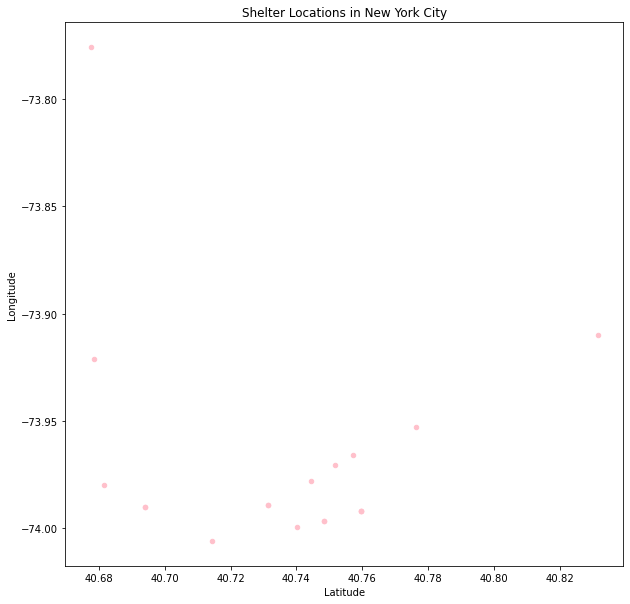

In [49]:
df.plot(kind='scatter', x='Latitude', y='Longitude', figsize=(10, 10), color='pink')
plt.title('Shelter Locations in New York City')

In [43]:
import statistics
med_lat=statistics.median(df['Latitude'])
med_lon=statistics.median(df['Longitude'])
print([med_lat,med_lon])

[40.7443, -73.9892]


Text(0.5, 1.0, 'Shelter Locations in New York City')

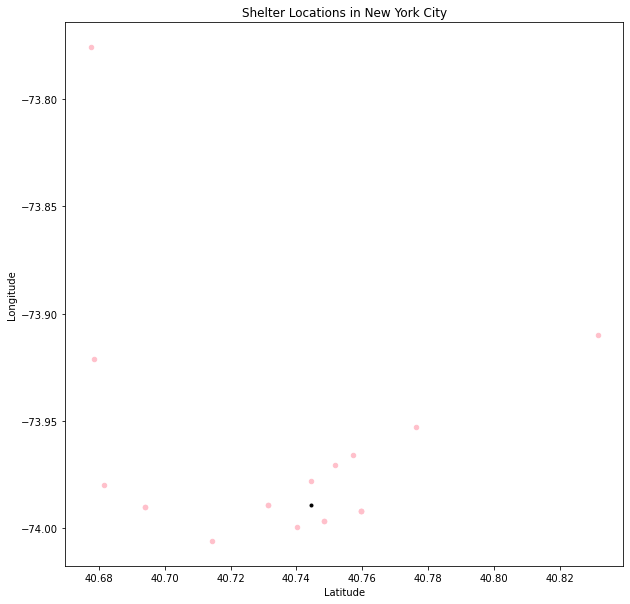

In [48]:
df.plot(kind='scatter', x='Latitude', y='Longitude', figsize=(10,10), color='pink')
plt.plot([med_lat],[med_lon], marker='o', markersize=3,color='black')
plt.title('Shelter Locations in New York City')

In [57]:
import geopy
import pandas as pd
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='shelters')

df = pd.DataFrame({
    'Lat': [med_lat],
    'Lon': [med_lon]
})
zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')
zipcodes

0    10001
dtype: object

In [45]:
#NYC map with Shelters located
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
kclusters=5
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Shelters'], df['Address']):
    label = folium.Popup(str(poi) + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

# Results

After analyzing the various locations of Homeless Shelters in New York City from a list provided by Breaking Ground, it is determined the ideal zip code of opening a Centralized Health Center for the homeless community is 10001, Chelsea neighborhood. 

This conclusion has been reached based on analyzing zip codes of shelters and their coordinates, and the median of all the locations listed. New York City is one of the wealtheist states for their popularity, resources, and uniqueness. However, there are also many downsides and flaws that are overseen, such as the struggles of particular communities. The focus of this project was to examine pre-existing centers and start a new Health Center that will streamline all resources available. To make this as accessible as possible to everyone looking for help, the neighborhood that is the cloest to other locations will be proven beneficial.

I propose opening a new Health Center in Chelsea of New York City (zip code: 10001). It is the median location between all 17 shelters, with the highest chance of allocating resources and coordinating communication between all branches. All the above analysis are prelimonary and there are always more to consider, such as site locations, accessiblity, and ever changing environment and needs of the community.

# Discussion

The analysis I have done here is relatively basic. To turn this idea into reality, more in-depth analysis will have to be conducted. The list of shelters that was used is also limited to 17 locations. It is possible there are more shelters available, but are sites that also provide other services, therefore not included here. It is also worth noting that most of these shelters are found in Manhattan, but other boroughs, such as Bronx, might be facing higher rates of homelessness. We should be placing these resources to act as prevention/intervention, as opposed to a late solution. 